### Data Processing

#### Data Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
%matplotlib inline

# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

soil = pd.read_excel("data/Cody_soil_table.xlsx")
soil = soil.fillna(0)
soil = soil.transpose()
soil.head()

Populating the interactive namespace from numpy and matplotlib


,Hematite,Illmenite,Goethite,Magnetite,Quartz,Gibbsite,1:1 Clay,Maghemite,Carbonate Minerals,Plagioclase,2:1 Clays,Dolomite,Pyroxene,Calcite,Olivine,Glass,Interlayered Smectite,NTM Culture,Microbiome,Group
HNL 12-6,2.80702,0,4.08187,1.9883,0,0,6.78363,0.538012,38.5965,32.9825,0,0,6.4,0,5.1462,0,0,pos,1,Kitchen_sink
HNL 12-4,1.287,8.75161,7.72201,15.3153,7.72201,2.4453,33.3333,1.60875,21.879,0,0,0,0,0,0,0,0,pos,1,Laterite_carbonate
HNL 12-2,11.0457,3.24006,1.47275,0.206186,3.68189,7.65832,33.2842,0,21.0604,18.4094,0,0,0,0,0,0,0,pos,1,Laterite_carbonate_plagioclase
HNL 12-39,23.5402,7.22519,14.1907,2.86561,0.558272,7.94945,36.2554,7.41512,0,0,0,0,0,0,0,0,0,neg,1,Laterite
HNL 12-61,10.4787,3.44097,30.5982,12.063,5.16915,7.15495,24.8656,6.22948,0,0,0,0,0,0,0,0,0,neg,0,Laterite


#### Subsample Negative Response Variables
The subsampled dataframe used in the visualizations below is created to balance the response variable NTM Culture. There are 11 positive cultures and 42 negative samples. The resulting dataframe is normalized to 11 in each category.

In [2]:
grouped = soil.groupby('NTM Culture')
nmax = 11
import random
random.seed(1)
balanced = grouped.apply(lambda x: x.sample(nmax) if len(x) > nmax else x)

#### Scale Column Values
This process is used to normalize the values for machine learning algorithms and for visualization purposes. 

In [3]:
## Split data into numeric and categorial categories
cols_to_drop = ["Interlayered Smectite", "NTM Culture", "Microbiome", "Group"]
soil_numeric = balanced.drop(cols_to_drop, axis=1)
soil_categorical = balanced.drop(balanced.columns[0:16], axis=1)

## Store Columns and Index for later
cols = soil_numeric.columns
soil_index = soil_numeric.index

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_df = ss.fit_transform(soil_numeric)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
scaled_df.index = soil_index

soil_scaled = pd.merge(scaled_df, soil_categorical, left_index=True, right_index=True)
soil_scaled.head()

Hematite  Illmenite  Goethite  Magnetite    Quartz  \
NTM Culture                                                                 
neg         HNL 12-30 -0.204677   0.460895 -0.657571   0.548351  0.655299   
            KAU 12-4   0.432724   3.159939  1.232888  -0.874960 -0.444039   
            KAU 12-6  -1.127232   2.030052  3.127904   1.740592  0.580439   
            HNL 12-16  0.238078  -0.234400 -0.649401  -0.612416 -0.843503   
            HNL 12-20  0.400676  -0.663635 -0.546076   0.652291 -0.290042   

                       Gibbsite  1:1 Clay  Maghemite  Carbonate Minerals  \
NTM Culture                                                                
neg         HNL 12-30 -0.453017  1.286562   0.455005           -0.717256   
            KAU 12-4   2.164306 -0.788687   0.332172           -0.374668   
            KAU 12-6  -0.024528 -1.056655  -0.938089           -0.717256   
            HNL 12-16 -0.681766  2.329936  -0.770297           -0.717256   
            HNL 12-20 -0.463040  0.688191  -0.935744           -0.010658   

                       Plagioclase  2:1 Clays  Dolomite  Pyroxene   Calcite  \
NTM Culture                                                                   
neg         HNL 12-30    -0.786806        0.0 -0.218218   -0.3209 -0.218218   
            KAU 12-4     -0.786806        0.0 -0.218218   -0.3209 -0.218218   
            KAU 12-6     -0.786806        0.0 -0.218218   -0.3209 -0.218218   
            HNL 12-16    -0.786806        0.0 -0.218218   -0.3209 -0.218218   
            HNL 12-20     0.034384        0.0 -0.218218   -0.3209 -0.218218   

                        Olivine  Glass Interlayered Smectite NTM Culture  \
NTM Culture                                                                
neg         HNL 12-30 -0.218218    0.0                     1         neg   
            KAU 12-4  -0.218218    0.0                     0         neg   
            KAU 12-6  -0.218218    0.0                     1         neg   
            HNL 12-16 -0.218218    0.0                     1         neg   
            HNL 12-20 -0.218218    0.0                     1         neg   

                      Microbiome                           Group  
NTM Culture                                                       
neg         HNL 12-30          1                        Laterite  
            KAU 12-4           0              Laterite_carbonate  
            KAU 12-6           0                        Laterite  
            HNL 12-16          0                        Laterite  
            HNL 12-20          0  Laterite_carbonate_plagioclase

### Feature Correlation

#### Correlation between Features and Outcome Variable (Culture Status)

In [5]:
soil_categorical['NTM Culture'].replace(('pos', 'neg'), (1,0), inplace=True)
soil_response = list(soil_categorical['NTM Culture'])

In [6]:
from scipy import stats
correlation_pearson = []
names2 = []
for z in range(0, 16):
    value = stats.pointbiserialr(np.array(soil_scaled[soil_scaled.columns[z]]), soil_response)
    names2.append(soil_scaled.columns[z])
    correlation_pearson.append(value)

/home/cody/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [7]:
Correlation = []
P_Value = []
x = [Correlation.append(x.correlation) for x in correlation_pearson]
x = [P_Value.append(x.pvalue) for x in correlation_pearson]
df_sig = pd.DataFrame(names2)
df_sig.columns = ['Soil_Minerals']
df_sig.set_index('Soil_Minerals')
df_sig['Correlation'] = Correlation
df_sig['P_Value'] = P_Value
df_sig

,Soil_Minerals,Correlation,P_Value
0,Hematite,-0.022717,0.920072
1,Illmenite,-0.318975,0.147923
2,Goethite,-0.034781,0.877879
3,Magnetite,-0.012169,0.957136
4,Quartz,0.034306,0.879534
5,Gibbsite,0.031337,0.889893
6,1:1 Clay,-0.226909,0.309869
7,Maghemite,0.049417,0.827126
8,Carbonate Minerals,0.158489,0.481148
9,Plagioclase,0.290894,0.189052


#### Significance of Features between groups

In [8]:
import numpy as np

def exact_mc_perm_test(xs, ys, nmc):
    n, k = len(xs), 0
    diff = np.abs(np.mean(xs) - np.mean(ys))
    zs = np.concatenate([xs, ys])
    for j in range(nmc):
        np.random.shuffle(zs)
        k += diff < np.abs(np.mean(zs[:n]) - np.mean(zs[n:]))
    return k / float(nmc)

In [9]:
positive = soil_scaled[soil_scaled['NTM Culture']=='pos']
negative = soil_scaled[soil_scaled['NTM Culture']=='neg']

cols_to_drop = ["Interlayered Smectite", "NTM Culture", "Microbiome", "Group"]
positive = positive.drop(cols_to_drop, axis=1)
negative = negative.drop(cols_to_drop, axis=1)

my_list = []
my_columns = []
for z in range(0, len(positive)):
    p_value = exact_mc_perm_test(np.array(positive[positive.columns[z]]), np.array(negative[negative.columns[z]]), 1000)
    my_columns.append(negative.columns[z])
    my_list.append(p_value)

In [10]:
df = pd.DataFrame(my_columns)
df['Permutated p_values'] = my_list
df

,0,Permutated p_values
0,Hematite,0.906
1,Illmenite,0.133
2,Goethite,0.889
3,Magnetite,0.954
4,Quartz,0.909
5,Gibbsite,0.891
6,1:1 Clay,0.315
7,Maghemite,0.814
8,Carbonate Minerals,0.505
9,Plagioclase,0.164


#### Test of Relation of Features Between Culture Groups

In [11]:
from scipy.stats import wilcoxon, shapiro, ttest_ind

pos_list = []
neg_list = []
my_columns = []

## Test if sample distribution per feature are normalily distributed
for i in range(len(positive.columns)):
    positive2 = shapiro(np.array(positive[positive.columns[i]]))
    negative2 = shapiro(np.array(negative[negative.columns[i]]))
    my_columns.append(negative.columns[i])
    pos_list.append(positive2[1])
    neg_list.append(negative2[1])

## Round to 2 significant figures    
pos_list = ['{:g}'.format(float('{:.2g}'.format(i))) for i in pos_list]
neg_list = ['{:g}'.format(float('{:.2g}'.format(i))) for i in neg_list]

## Combine Values to Matrix 
Normalilty_Matrix = pd.DataFrame(my_columns)
Normalilty_Matrix['Positive Normality'] = pos_list
Normalilty_Matrix['Negative Normality'] = neg_list
Normalilty_Matrix

## Warning likely due to the sample with glass and the sample with olivine, both are only present in one sample

/home/cody/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1307: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


,0,Positive Normality,Negative Normality
0,Hematite,0.34,0.18
1,Illmenite,0.0089,0.0061
2,Goethite,0.34,0.004
3,Magnetite,0.00065,0.24
4,Quartz,7.1e-05,0.38
5,Gibbsite,0.23,0.059
6,1:1 Clay,0.51,0.64
7,Maghemite,0.027,0.051
8,Carbonate Minerals,0.0018,0.0015
9,Plagioclase,0.034,0.00051


Normal Columns are defined by the table above in which both Positive and Negative Normality tests are greater than 0.05 failing to reject the null hypothesis that these are drawn from normally distributed samples. These columns will be tested with parameteric t-test, while the others will use a non-parametric wilcoxon test.


In [17]:
Normal_Columns = ['Glass', '2:1 Clays', '1:1 Clay', 'Gibbsite', 'Goethite', 'Hematite']

## Subset Data Frames into Normal and NonNormal Columns
positive_norm = positive[Normal_Columns]
positive_non_norm = positive.drop(Normal_Columns, 1)

negative_norm = negative[Normal_Columns]
negative_non_norm = negative.drop(Normal_Columns, 1)

In [24]:
p_value_list = []

my_columns = []

## Run Nonparameteric Tests
for i in range(len(positive_non_norm.columns)):
    test = wilcoxon(np.array(positive_non_norm[positive_non_norm.columns[i]]), np.array(negative_non_norm[negative_non_norm.columns[i]]), zero_method="pratt")
    my_columns.append(negative_non_norm.columns[i])
    p_value_list.append(test.pvalue)
    
## Run Parametric Tests
for i in range(len(positive_norm.columns)):
    test = ttest_ind(np.array(positive_norm[positive_norm.columns[i]]), np.array(negative_norm[negative_norm.columns[i]]), equal_var=False)
    my_columns.append(negative_norm.columns[i])
    p_value_list.append(test.pvalue)

    
## Combine Values into Matrix 
Significance_Matrix = pd.DataFrame(my_columns)
Significance_Matrix['P_Value'] = p_value_list
Significance_Matrix.columns = ['Feature', 'P_Value']

Significance_Matrix

,Feature,P_Value
0,Illmenite,0.213223
1,Magnetite,0.328065
2,Quartz,0.656642
3,Maghemite,0.789675
4,Carbonate Minerals,0.286003
5,Plagioclase,0.182314
6,Dolomite,0.003346
7,Pyroxene,0.050461
8,Calcite,0.003346
9,Olivine,0.003346


#### Boxplots of Significant Features

#### Feature Heatmap

Text(0.5,0.98,'Soil Attributes Correlation Heatmap')

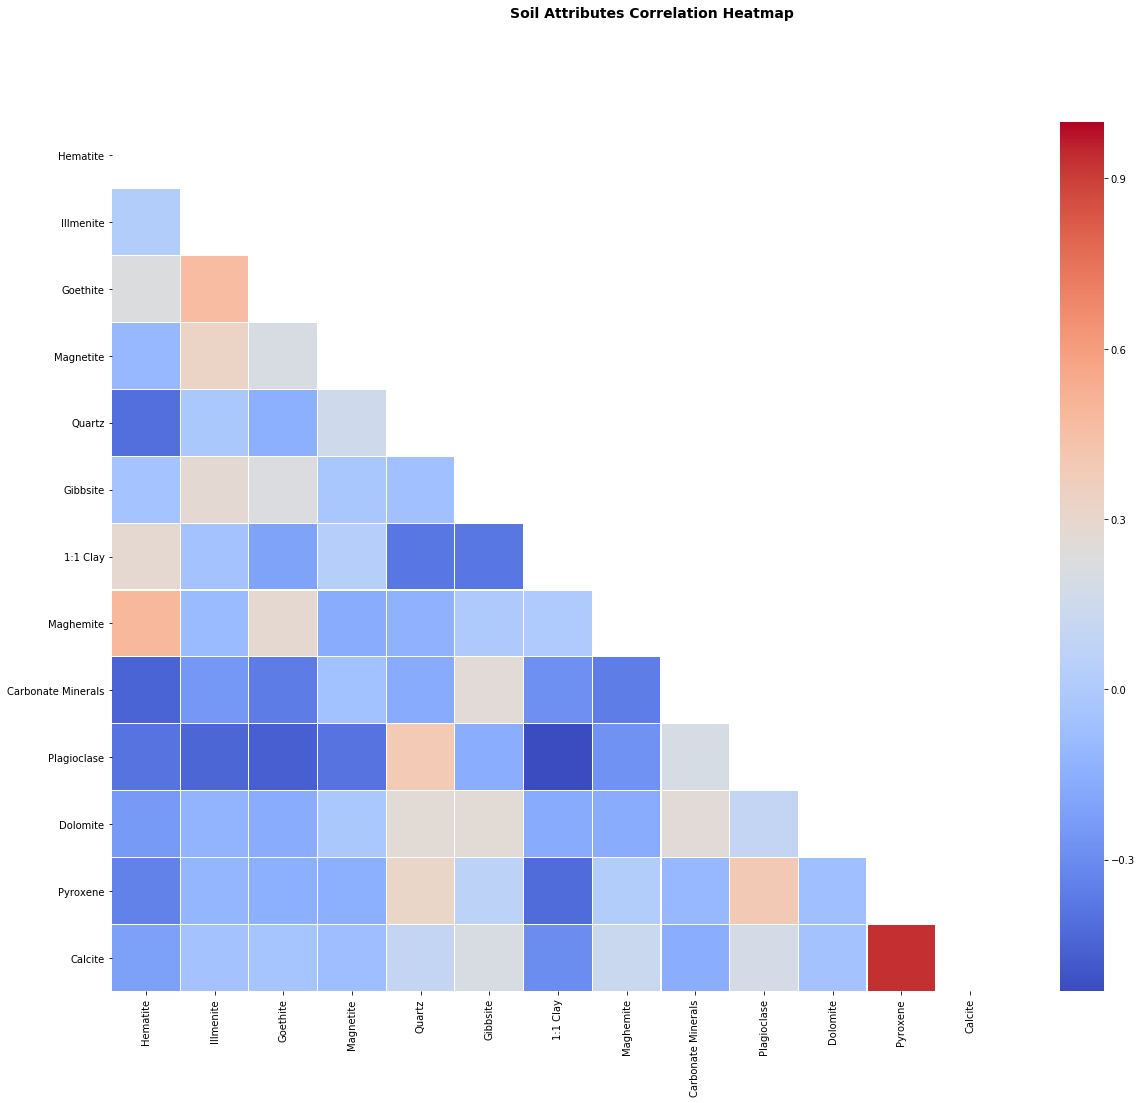

In [26]:
import seaborn as sns
import numpy as np

### Remove Empty Columns
Empty_Columns = ['Glass', '2:1 Clays', "Olivine"]
soil_scaled2 = soil_scaled.drop(Empty_Columns, 1)

corr_matrix = soil_scaled2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, (ax) = plt.subplots(1, 1, figsize=(20,16))
hm = sns.heatmap(corr_matrix,
                 mask=mask,
                 ax=ax, # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 square=False,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=False, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)
fig.suptitle('Soil Attributes Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')

#### Parallel Coordinates

In [28]:
plt.rc('legend',**{'fontsize':12})
from pandas.plotting import parallel_coordinates

##### Balanced Dataset Full Samples

###### By NTM Culture

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.]),
 <a list of 10 Text yticklabel objects>)

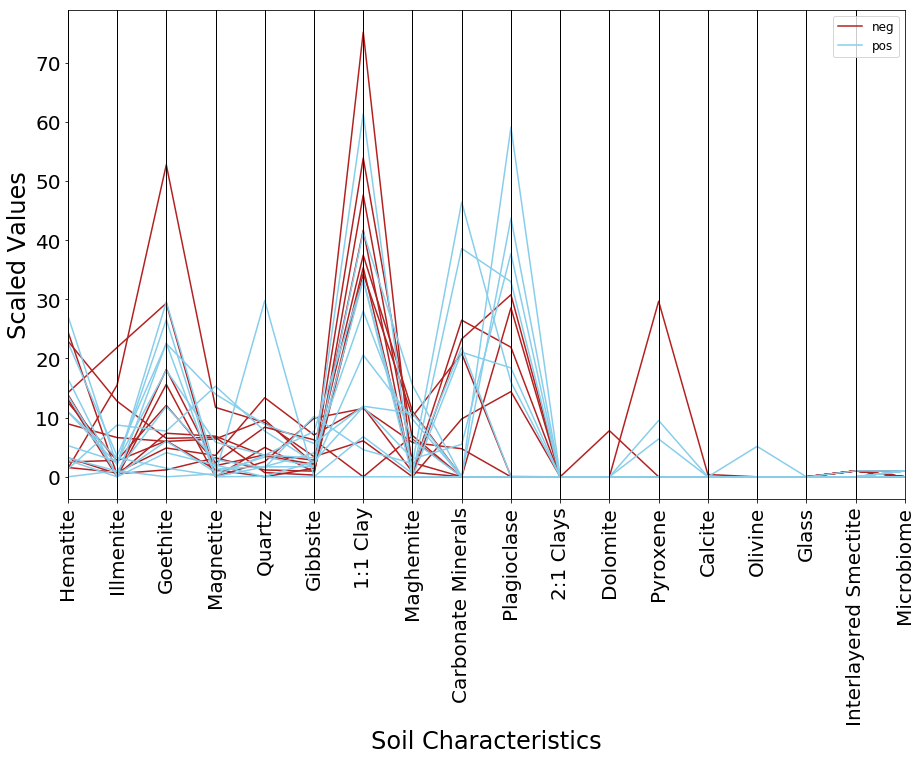

In [29]:
soil_scaled2 = balanced.drop("Group", axis=1)
pc = parallel_coordinates(soil_scaled2, 
                          'NTM Culture', 
                          color=('firebrick', 'skyblue'))
pc.set_xticklabels(pc.get_xticklabels(),rotation=90)
plt.grid(False)
plt.xlabel('Soil Characteristics', size = 24)
plt.ylabel('Scaled Values', size = 24)
plt.xticks(size = 20)
plt.yticks(size = 20)

###### By Group

(array([-2.,  0.,  2.,  4.,  6.,  8.]), <a list of 6 Text yticklabel objects>)

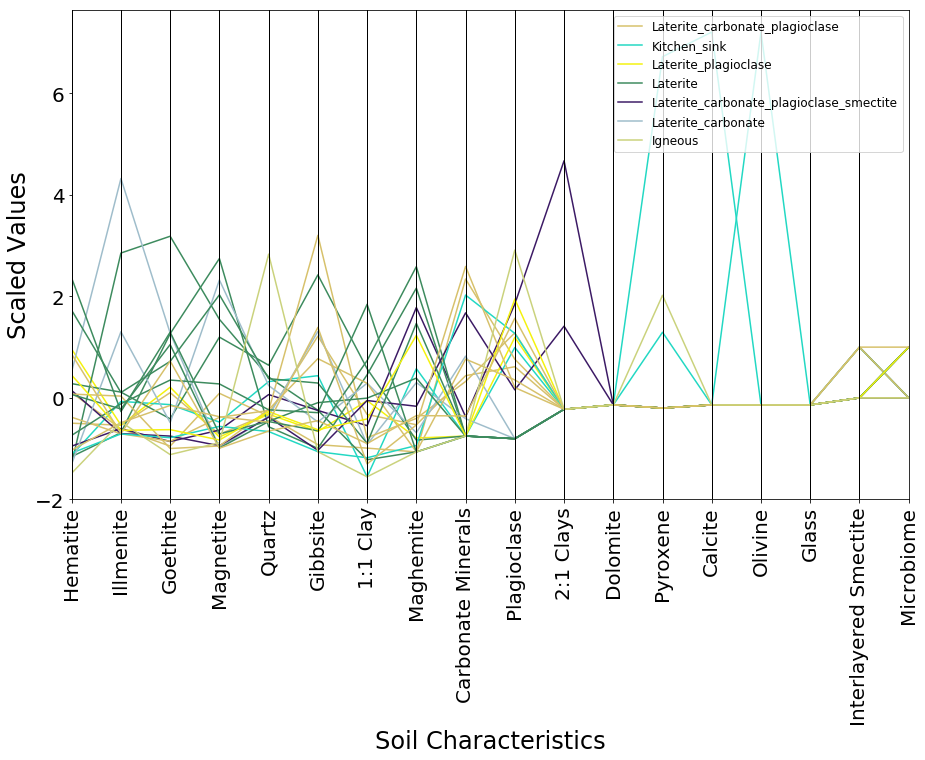

In [35]:
soil_scaled2 = balanced.drop("NTM Culture", axis=1)
pc = parallel_coordinates(soil_scaled2, 
                          'Group')
pc.set_xticklabels(pc.get_xticklabels(),rotation=90)
plt.grid(False)
plt.xlabel('Soil Characteristics', size = 24)
plt.ylabel('Scaled Values', size = 24)
plt.xticks(size = 20)
plt.yticks(size = 20)

###### By Interlayered Smectite

(array([-2.,  0.,  2.,  4.,  6.,  8.]), <a list of 6 Text yticklabel objects>)

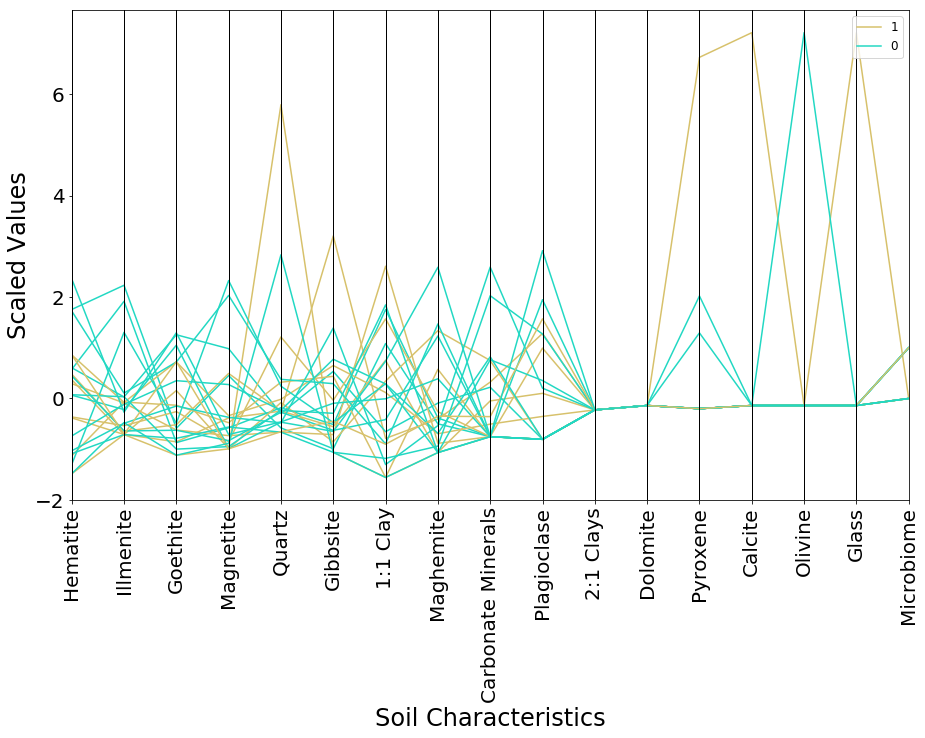

In [39]:
soil_scaled2 = balanced.drop(["NTM Culture", "Group"], axis=1)
pc = parallel_coordinates(soil_scaled2, 
                          'Interlayered Smectite')
pc.set_xticklabels(pc.get_xticklabels(),rotation=90)
plt.grid(False)
plt.xlabel('Soil Characteristics', size = 24)
plt.ylabel('Scaled Values', size = 24)
plt.xticks(size = 20)
plt.yticks(size = 20)

##### Balanced Dataset Showing Mean

In [32]:
culture_std = balanced.groupby("NTM Culture").std()

culture_average = balanced.groupby('NTM Culture').mean()
culture_average['NTM Culture'] = culture_average.index
#culture_average['NTM Culture'].replace(('pos', 'neg'), ('Positive Culture', 'Negative Culture'), inplace=True)


x_axis = list(culture_average.columns)
x_axis.pop()
x_axis = [str(x) for x in x_axis]

### means
negative_means = list(culture_average.iloc[0])
positive_means = list(culture_average.iloc[1])

negative_means.pop()
positive_means.pop()

negative_means = np.array(negative_means)
positive_means = np.array(positive_means)

### standard deviations
negative_std = np.array(culture_std.iloc[0])
positive_std = culture_std.iloc[1]

/home/cody/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'NTM Culture' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


DataError: No numeric types to aggregate

NameError: name 'negative_means' is not defined

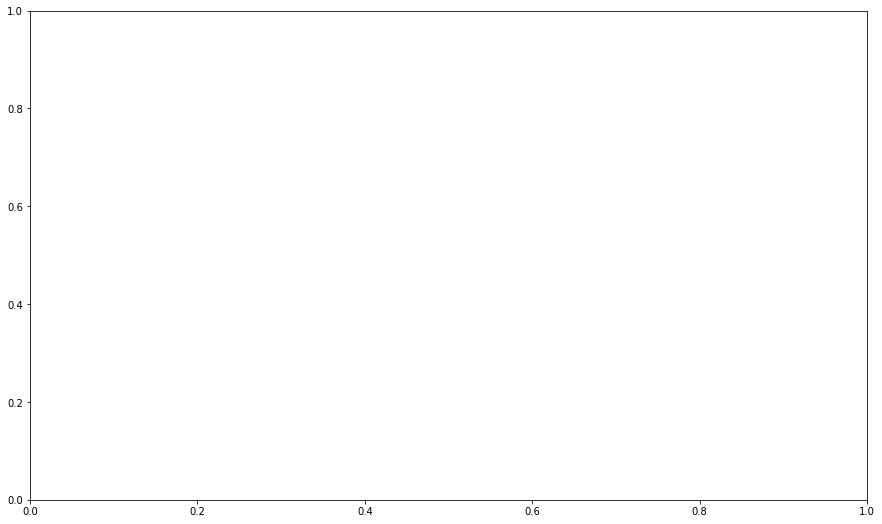

In [31]:
# plot it!
fig, ax = plt.subplots(1)
ax.plot(negative_means, lw=2, label='mean population 1', color='blue')
plt.fill_between(x_axis, negative_means+negative_std, negative_means-negative_std, facecolor='blue', alpha=0.5)

ax.plot(positive_means, lw=2, label='mean population 2', color='yellow')

plt.fill_between(x_axis, positive_means+positive_std, positive_means-positive_std, facecolor='yellow', alpha=0.5)

#ax.errorbar(x=culture_std.columns,y=negative_means, yerr=negative_std, fmt='-o')
#ax.add_line(negative_means-negative_std)

plt.xticks(rotation=45) 

In [ ]:
soil_scaled2 = soil_scaled.drop("NTM Culture", axis=1)
pc = parallel_coordinates(soil_scaled2, 
                          'Group')
pc.set_xticklabels(pc.get_xticklabels(),rotation=90)
plt.grid(False)
plt.xlabel('Soil Characteristics', size = 24)
plt.ylabel('Scaled Values', size = 24)
plt.xticks(size = 20)
plt.yticks(size = 20)

##### Full Data

###### By NTM Culture

(array([-2.,  0.,  2.,  4.,  6.,  8.]), <a list of 6 Text yticklabel objects>)

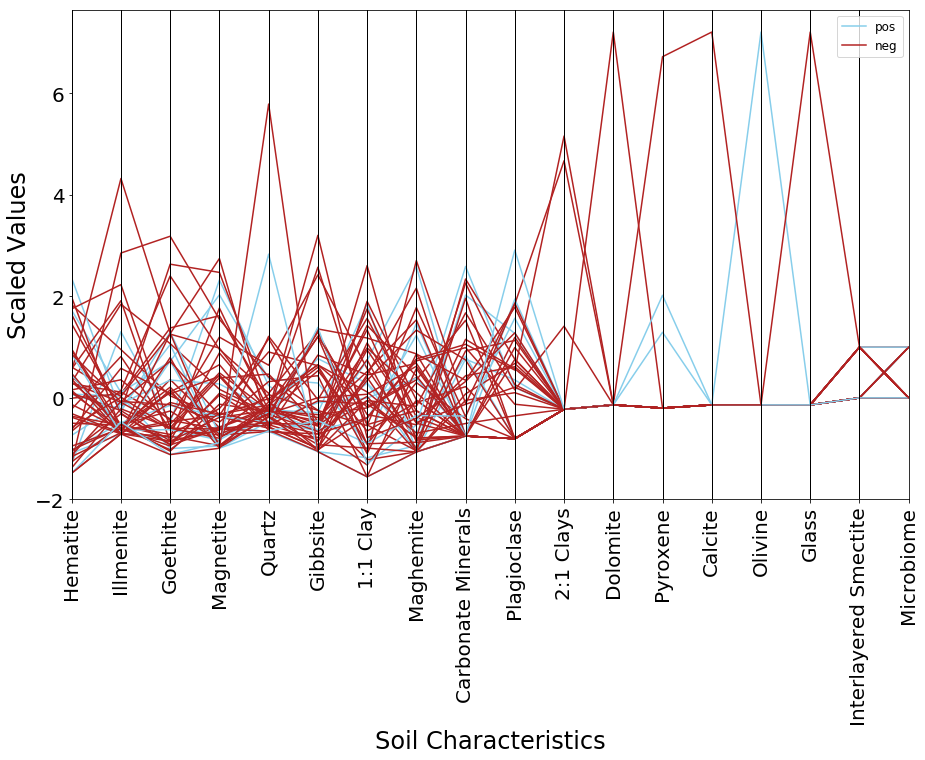

In [27]:
soil_scaled2 = soil_scaled.drop("Group", axis=1)
pc = parallel_coordinates(soil_scaled2, 
                          'NTM Culture', 
                          color=('skyblue', 'firebrick'))
pc.set_xticklabels(pc.get_xticklabels(),rotation=90)
plt.grid(False)
plt.xlabel('Soil Characteristics', size = 24)
plt.ylabel('Scaled Values', size = 24)
plt.xticks(size = 20)
plt.yticks(size = 20)

###### By Group

(array([-2.,  0.,  2.,  4.,  6.,  8.]), <a list of 6 Text yticklabel objects>)

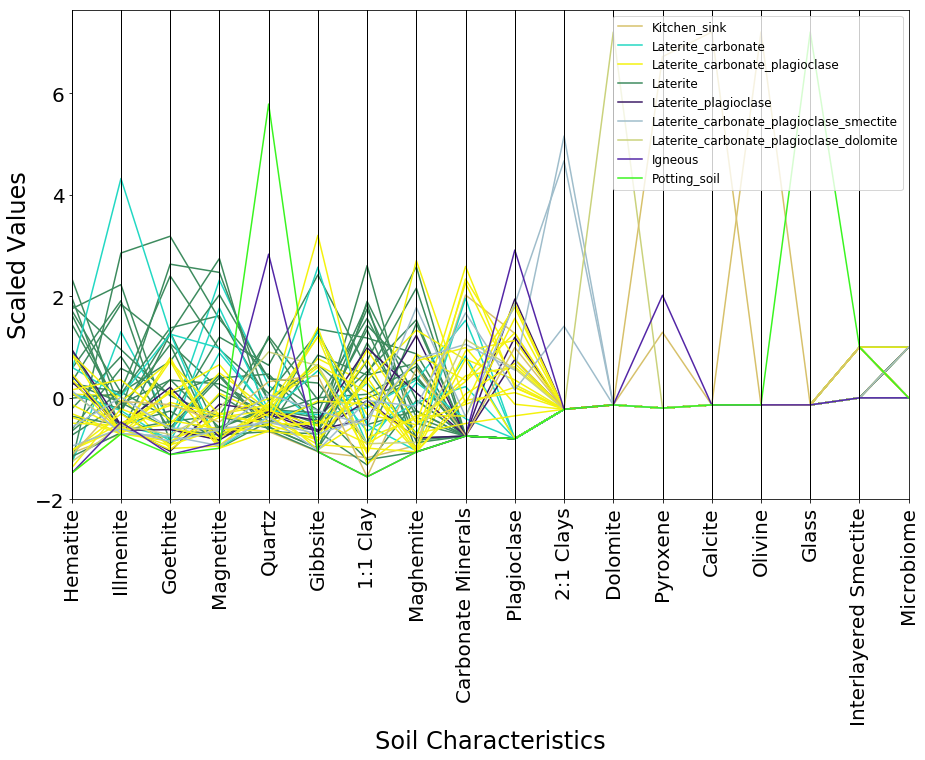

In [30]:
soil_scaled2 = soil_scaled.drop("NTM Culture", axis=1)
pc = parallel_coordinates(soil_scaled2, 
                          'Group')
pc.set_xticklabels(pc.get_xticklabels(),rotation=90)
plt.grid(False)
plt.xlabel('Soil Characteristics', size = 24)
plt.ylabel('Scaled Values', size = 24)
plt.xticks(size = 20)
plt.yticks(size = 20)

###### By Interlayered Smecite

(array([-2.,  0.,  2.,  4.,  6.,  8.]), <a list of 6 Text yticklabel objects>)

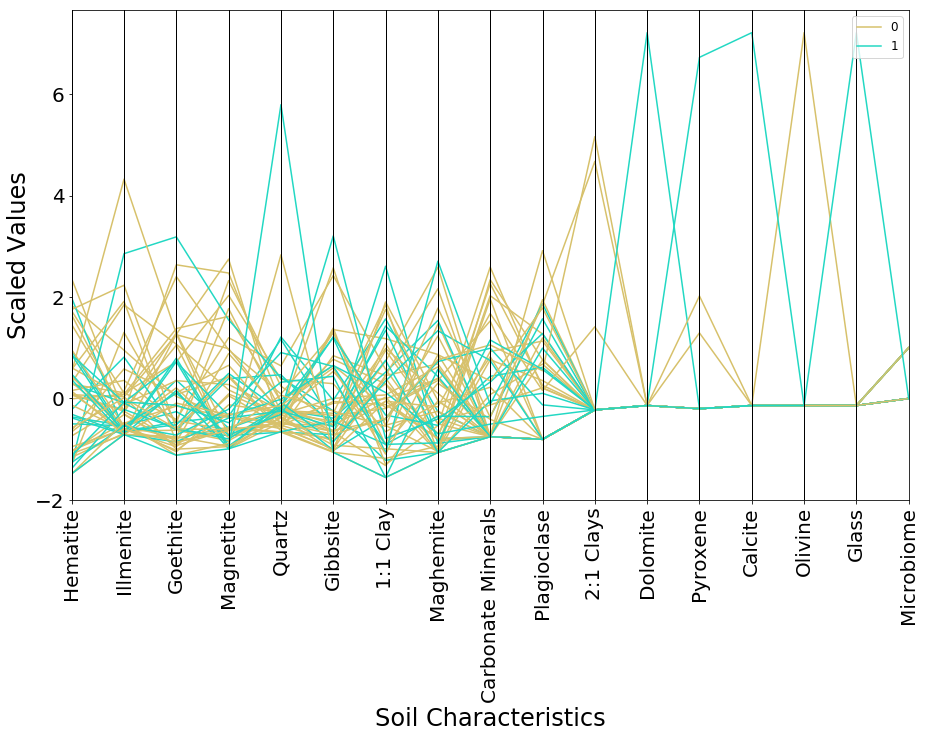

In [31]:
soil_scaled2 = soil_scaled.drop(["NTM Culture", "Group"], axis=1)
pc = parallel_coordinates(soil_scaled2, 
                          'Interlayered Smectite')
pc.set_xticklabels(pc.get_xticklabels(),rotation=90)
plt.grid(False)
plt.xlabel('Soil Characteristics', size = 24)
plt.ylabel('Scaled Values', size = 24)
plt.xticks(size = 20)
plt.yticks(size = 20)